<a href="https://colab.research.google.com/github/miguelsmachado/data_science/blob/master/Forma%C3%A7%C3%A3o_Data_Science_Alura_An%C3%A1lise_explorat%C3%B3ria_do_MovieLens_Miguel_S_Machado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Miguel S. Machado
##A análise dos dados do MovieLens é uma análise bem educativa e que nos mostra o grande potencial da Ciência de Dados. Análisamos diversas relações entre gêneros e entre filmes para chegarmos a diversas conclusões interessantes!
## Continue lendo para ver como Data Science é muito divertido!

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [0]:
# Como estava tendo problemas na execução dos distplot cumulativos, e as versões
# instaladas atendiam os requisitos, comentei as instalações.

# !pip install pandas=="0.24.0" --quiet
# !pip install seaborn=="0.9.0" --quiet
# !pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.4
Usando seaborn 0.10.1
Usando scipy 1.4.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [0]:
# solução
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv")
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.set_index('filmeId', inplace=True)

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [0]:
# solução
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv")
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [0]:
# solução
filmes['nota_media'] = notas.groupby(['filmeId'])['nota'].mean()

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [0]:
# solução para calcular o total de votos por filme
filmes['total_de_votos'] = notas.groupby(['filmeId'])['nota'].count()

In [0]:
# solução para criar a nova coluna e filtrar os filmes
selecao = filmes.total_de_votos > 50
filmes = filmes[selecao]

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

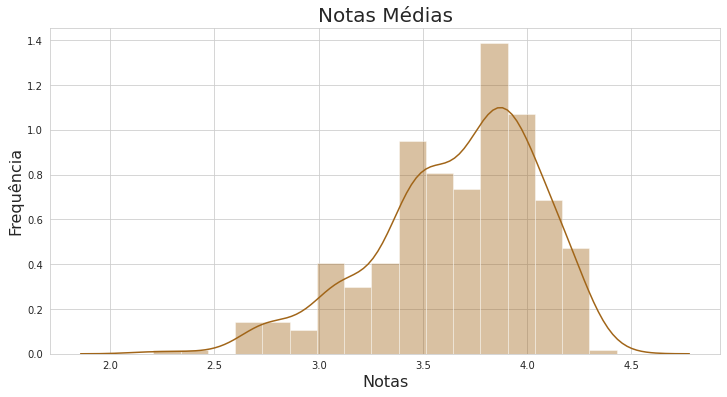

In [14]:
# solução histograma
sns.set_style('whitegrid')
sns.set_palette("BrBG")
ax = sns.distplot(filmes.nota_media)
ax.figure.set_size_inches(12, 6)
ax.set_title("Notas Médias", fontsize=20)
ax.set_xlabel('Notas', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16);

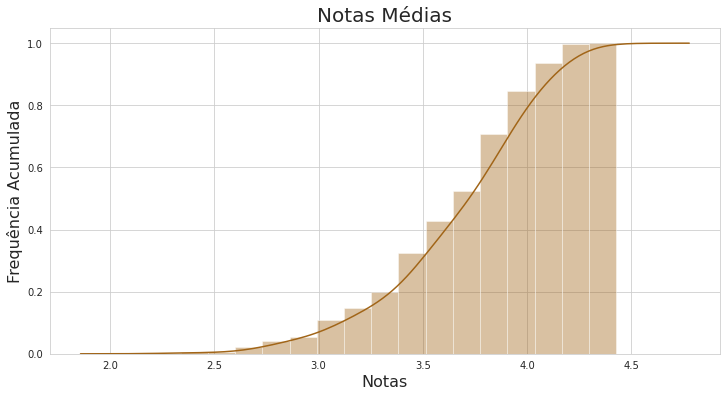

In [15]:
# solução cumulativa
ax = sns.distplot(filmes.nota_media, hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.figure.set_size_inches(12, 6)
ax.set_title("Notas Médias", fontsize=20)
ax.set_xlabel('Notas', fontsize=16)
ax.set_ylabel('Frequência Acumulada', fontsize=16);

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

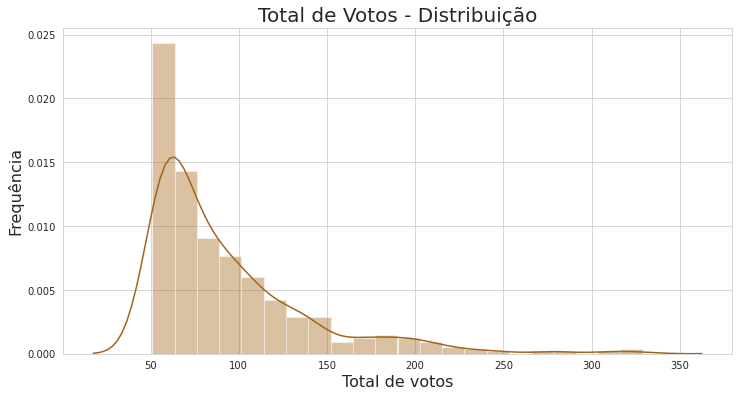

In [16]:
# solução histograma
ax = sns.distplot(filmes.total_de_votos)
ax.figure.set_size_inches(12, 6)
ax.set_title("Total de Votos - Distribuição", fontsize=20)
ax.set_xlabel('Total de votos', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16);

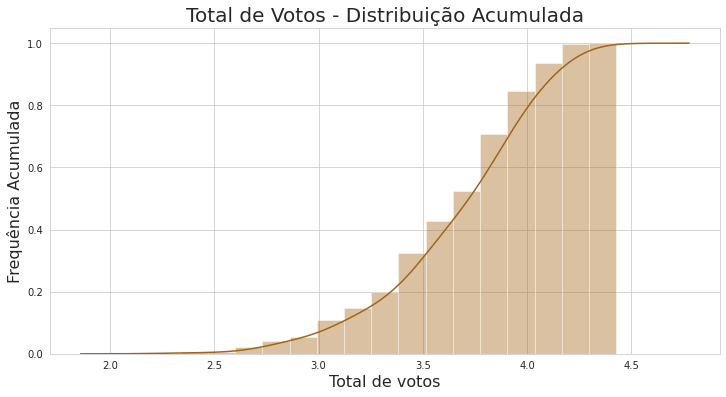

In [17]:
# solução cumulativa
ax = sns.distplot(filmes.nota_media, hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.figure.set_size_inches(12, 6)
ax.set_title("Total de Votos - Distribuição Acumulada", fontsize=20)
ax.set_xlabel('Total de votos', fontsize=16)
ax.set_ylabel('Frequência Acumulada', fontsize=16);

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [18]:
# solução
nota_limite_dos_20_porcento = filmes.nota_media.quantile(0.8)
nota_limite_dos_20_porcento

3.993150684931507

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

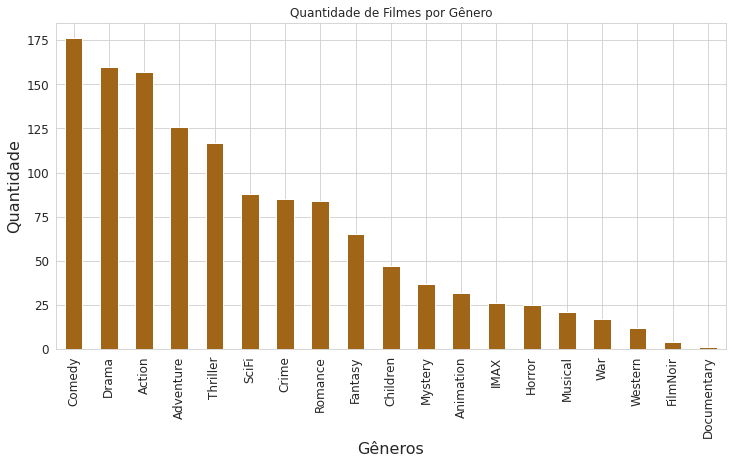

In [22]:
# solução
ax = generos.sum().sort_values(ascending=False).plot(kind='bar',
                                                     title='Quantidade de Filmes por Gênero',
                                                     figsize=(12,6),
                                                     fontsize=12)
ax.set_xlabel("Gêneros", fontsize=16)
ax.set_ylabel("Quantidade", fontsize=16)
ax;

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [0]:
# solução
top5_generos_em_quantidade_de_filmes = generos.sum().sort_values(ascending=False).head()

In [24]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       176
Drama        160
Action       157
Adventure    126
Thriller     117
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
# solucão
votos_por_genero_por_filme.sum().sort_values(ascending=False)

Action         15384.0
Drama          15145.0
Comedy         15080.0
Adventure      12817.0
Thriller       11707.0
SciFi           8789.0
Crime           8549.0
Romance         7394.0
Fantasy         5943.0
Children        4331.0
Mystery         3402.0
Animation       3066.0
IMAX            2392.0
Horror          2165.0
War             2013.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary       58.0
dtype: float64

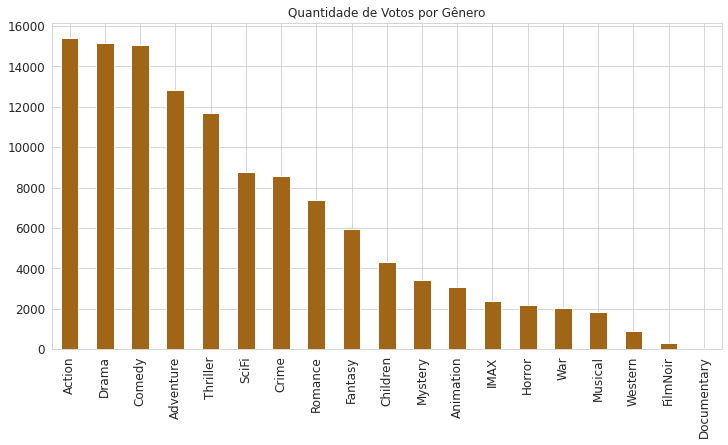

In [27]:
# solução
votos_por_genero_por_filme.sum().sort_values(ascending=False).plot(kind='bar',
                                                     title='Quantidade de Votos por Gênero',
                                                     figsize=(12,6),
                                                     fontsize=12)
ax.set_xlabel("Gêneros", fontsize=16)
ax.set_ylabel("Quantidade de votos", fontsize=16)
ax;

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solucao código
popularidade = (votos_por_genero_por_filme.sum() / generos.sum()).round(2)
popularidade.sort_values(ascending=False)

War            118.41
Adventure      101.72
Crime          100.58
Thriller       100.06
SciFi           99.88
Action          97.99
Animation       95.81
Drama           94.66
Children        92.15
IMAX            92.00
Mystery         91.95
Fantasy         91.43
Romance         88.02
Musical         86.76
Horror          86.60
Comedy          85.68
Western         75.00
FilmNoir        72.75
Documentary     58.00
dtype: float64

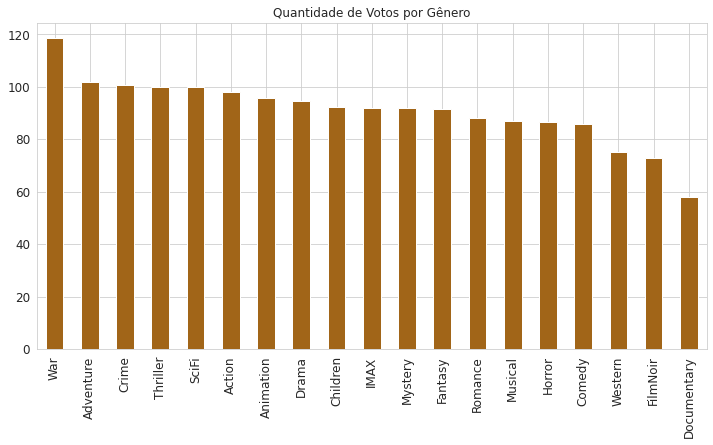

In [29]:
# solução com visualização 
popularidade.sort_values(ascending=False).plot(kind='bar',
                                                     title='Quantidade de Votos por Gênero',
                                                     figsize=(12,6),
                                                     fontsize=12)
ax.set_xlabel("Gêneros", fontsize=16)
ax.set_ylabel("Quantidade de votos por gênero por filme", fontsize=16)
ax;

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):

####Temos muito mais filmes de `Action`, por esse motivo, eles também possuem um maior número de avaliações ao todo. Porém, as pessoas que assistem filmes de `War`, possivelmente, frenquentam mais o site de avaliações e são mais comprometidos em realizar avaliações.
    
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

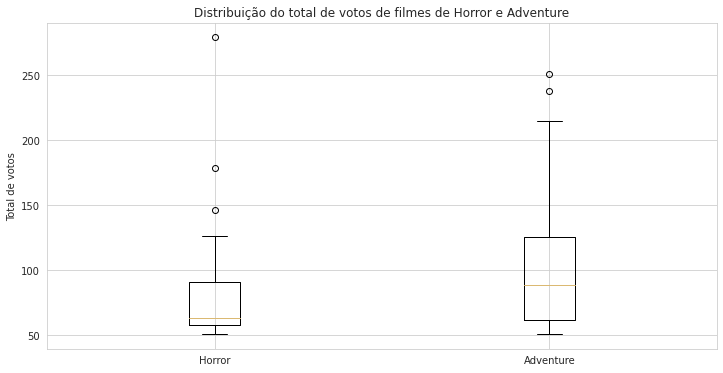

In [30]:
# solução:
data_to_plot = []
for x in ['Horror', 'Adventure']:
  data_to_plot.append(filmes.query(f'{x} == 1')['total_de_votos'])
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.set_title("Distribuição do total de votos de filmes de Horror e Adventure")
ax.set_ylabel("Total de votos")
ax.boxplot(data_to_plot, labels=['Horror', 'Adventure']);


## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


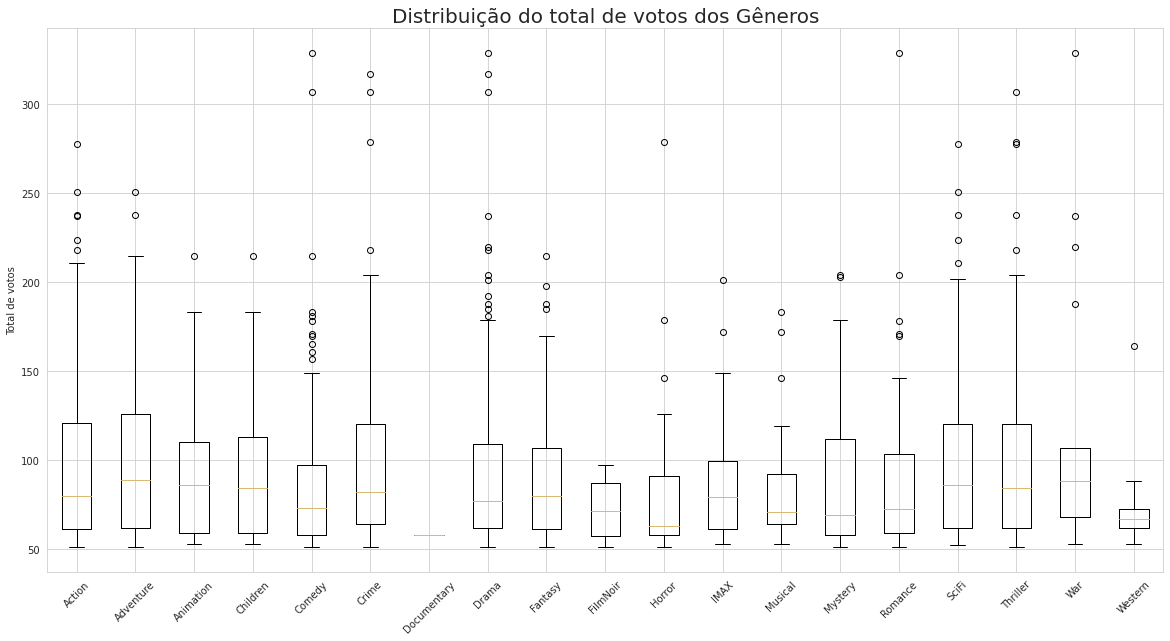

In [31]:
data_to_plot = []
for x in generos.columns:
  data_to_plot.append(filmes.query(f'{x} == 1')['total_de_votos'])
fig = plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
ax = fig.add_subplot(111)
ax.set_title("Distribuição do total de votos dos Gêneros", fontsize=20)
ax.set_ylabel("Total de votos")
ax.boxplot(data_to_plot, labels=generos.columns);

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:

**ADVENTURE**, pois é um um tipo de filme que, em todas as nossas análises, se mostra mais popular que filmes de terror. Tem muito mais filmes do tipo, recebe muitas avaliações e tem uma popularidade alta. Tudo isso nos mostra que esse tipo de filme tem muito mais audiência.
    


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

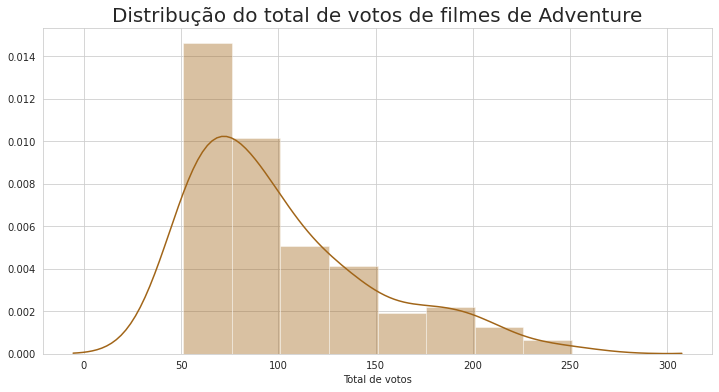

In [32]:
# solucao histograma de aventura
ax = sns.distplot(filmes.query('Adventure == 1')['total_de_votos'])
ax.set_title("Distribução do total de votos de filmes de Adventure", fontsize=20)
ax.figure.set_size_inches(12, 6)
ax.set_xlabel("Total de votos");

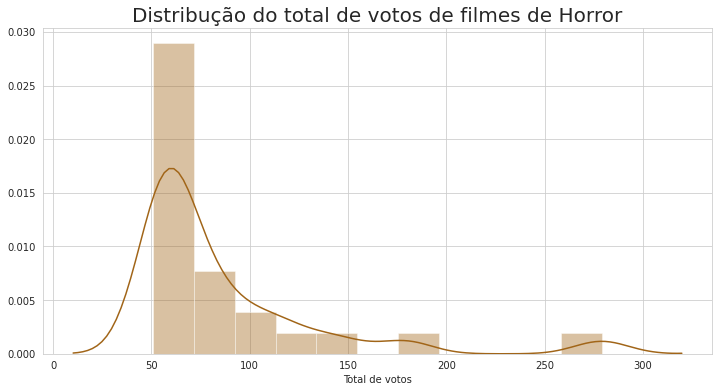

In [33]:
# solucao histograma de horror
ax = sns.distplot(filmes.query('Horror == 1')['total_de_votos'])
ax.set_title("Distribução do total de votos de filmes de Horror", fontsize=20)
ax.figure.set_size_inches(12, 6)
ax.set_xlabel("Total de votos");

In [0]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

In [35]:
_, p = normaltest(filmes.query('Horror == 1')['total_de_votos'])
p

2.417812105177672e-07

In [36]:
_, p = normaltest(filmes.query('Adventure == 1')['total_de_votos'])
p

1.58724177983542e-05

In [0]:
# solução com o teste desejado
from scipy.stats import ranksums

In [38]:
ranksums(filmes.query('Horror == 1')['total_de_votos'], filmes.query('Adventure == 1')['total_de_votos'])

RanksumsResult(statistic=-2.1727175965564336, pvalue=0.029801578566891647)

### Solução (explique sua conclusão):
O resultado do Pvalue nos mostra que não é uma ditribuição e normal, e por isso foi aplicado um teste não paramétrico(ranksums) e o resultado do teste nos mostra que os dados possivelmente vem de uma mesma distribuição, o que não nos permite saber se existe um relação entre ele sobre qual é maior e qual é menor.
Dessa forma, como diretor, não tomaria uma decisão que envolva tanto dinheiro baseado apenas nesses dados.



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

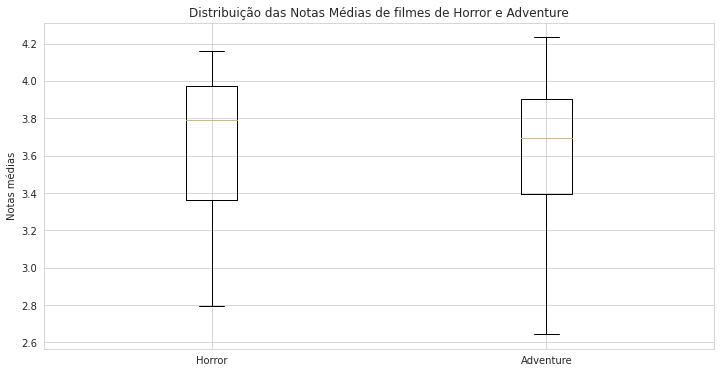

In [39]:
# solução:
data_to_plot = []
for x in ['Horror', 'Adventure']:
  data_to_plot.append(filmes.query(f'{x} == 1')['nota_media'])
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.set_title("Distribuição das Notas Médias de filmes de Horror e Adventure")
ax.set_ylabel("Notas médias")
ax.boxplot(data_to_plot, labels=['Horror', 'Adventure']);

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

**Horror**, pois apesar de de ser menos popular, seu público tem uma tendencia de avaliar com notas mais altas.



## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

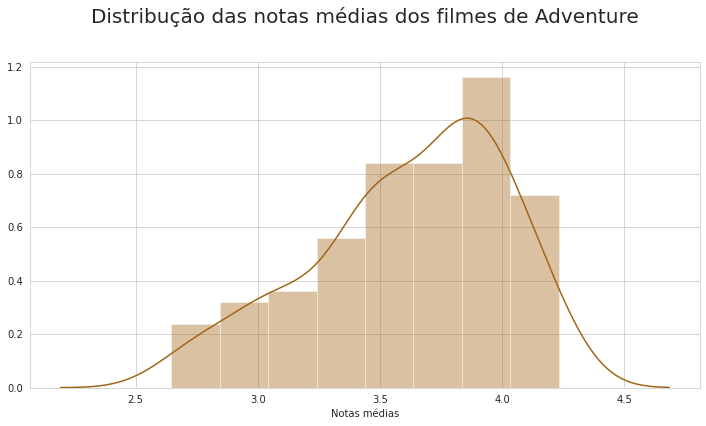

In [40]:
# solucao histograma de aventura
ax = sns.distplot(filmes.query('Adventure == 1')['nota_media'])
ax.set_title("Distribução das notas médias dos filmes de Adventure", fontsize=20, y=1.1)
ax.figure.set_size_inches(12, 6)
ax.set_xlabel("Notas médias"); 

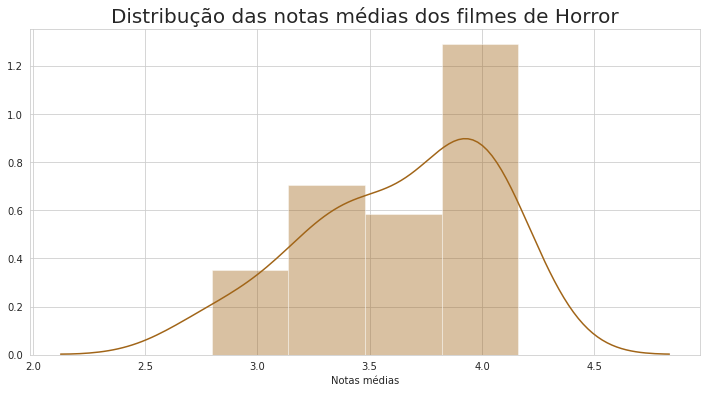

In [41]:
# solucao histograma de horror
ax = sns.distplot(filmes.query('Horror == 1')['nota_media'])
ax.set_title("Distribução das notas médias dos filmes de Horror", fontsize=20)
ax.figure.set_size_inches(12, 6)
ax.set_xlabel("Notas médias"); 

In [42]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
_, p = normaltest(filmes.query('Adventure == 1')['nota_media'])
p

0.016341547276884364

In [43]:
_, p = normaltest(filmes.query('Horror == 1')['nota_media'])
p

0.2893086330036122

In [44]:
# solução com o teste desejado
ranksums(filmes.query('Horror == 1')['nota_media'], filmes.query('Adventure == 1')['nota_media'])

RanksumsResult(statistic=0.4180228555586687, pvalue=0.6759304067428379)

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Com os dados que são disponibilizados manteria a mesma opnião, porém assim como na avaliação anterior, como diretor, não tomaria uma decisão tão impotante baseado apenas nesses dados.


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

A diferença da nota não é tão consideravel assim. Como agora temos um segundo critério também, seria mais prudente sacrificar 0.1 da nota média para que possamos obter êxito no segundo critério também. Dessa forma, escolheria filme de **Adventure**.


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [45]:
# solução: calculando os 2 generos mais votados
votos_por_genero_por_filme.sum().sort_values(ascending=False).head(2)

Action    15384.0
Drama     15145.0
dtype: float64

In [46]:
# solução: encontrando os top 5 filmes desses generos
filmes.query("Drama == 1 & Action == 1")[['titulo', 'nota_media']].sort_values('nota_media', ascending=False).head()

,titulo,nota_media
filmeId,,
2959,Fight Club (1999),4.272936
58559,"Dark Knight, The (2008)",4.238255
1208,Apocalypse Now (1979),4.219626
6016,City of God (Cidade de Deus) (2002),4.146667
2028,Saving Private Ryan (1998),4.146277


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [47]:
# solucao
filmes.corr()['nota_media'].sort_values(ascending=False)[2:4]

Drama    0.279718
Crime    0.184099
Name: nota_media, dtype: float64

## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [48]:
# solucao
filmes.corr()['total_de_votos'].sort_values(ascending=False)[2:4]

Adventure    0.116933
War          0.109781
Name: total_de_votos, dtype: float64

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

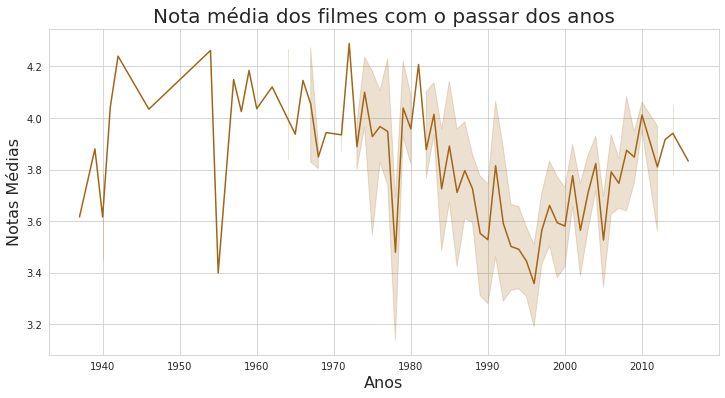

In [49]:
# solucao
ax = sns.lineplot(data=filmes, x='ano_de_lancamento', y='nota_media')
ax.figure.set_size_inches(12, 6)
ax.set_title("Nota média dos filmes com o passar dos anos", fontsize=20)
ax.set_xlabel('Anos', fontsize=16)
ax.set_ylabel('Notas Médias', fontsize=16);

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [50]:
# solução (código)
filmes[['nota_media', 'ano_de_lancamento']].corr()

,nota_media,ano_de_lancamento
nota_media,1.000000,-0.161482
ano_de_lancamento,-0.161482,1.000000


### Solução (explicação)

A ditribuição dos dados pode causar problema nesse tipo de dataset, pois temos poucos filmes mais antigos, os quais normalmente, são apreciados por adoradores de cinema e usuários ativos de sites de avalição de filmes. Além do que, a forma como os dados foram inseridos no dataset, provavelmente essa inserção não conteplou os filmes antigos ruins, ao contrário dos filmes atuais, que possuem muitos filmes "ruins". Por isso não podemos confiar cegamente na correlação sem analisar o dataset, se o fizessemos, concluiríamos, erradamente, que com o passar dos anos, os filmes pioram.


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

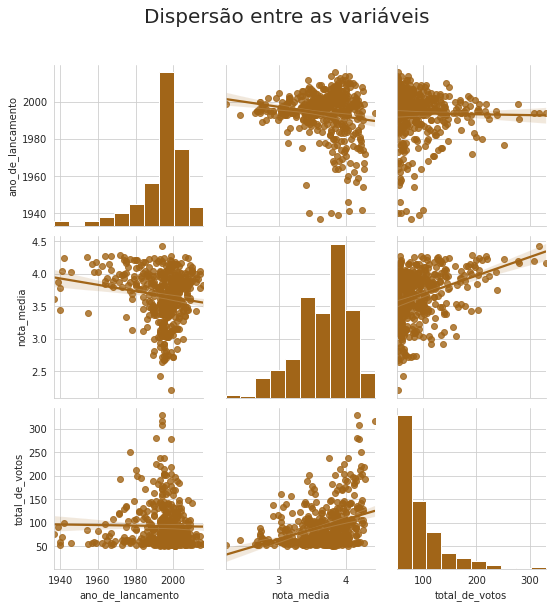

In [51]:
# solução
infos = filmes[['ano_de_lancamento', 'nota_media','total_de_votos']]
ax = sns.pairplot(infos, kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.1)
ax;


## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

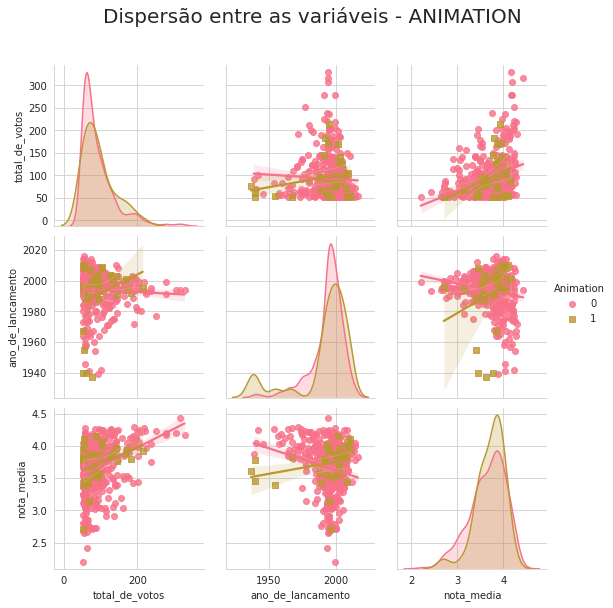

In [52]:
# solução
sns.set_palette('husl')
ax = sns.pairplot(filmes, x_vars=['total_de_votos', 'ano_de_lancamento', 'nota_media'],
                  y_vars=['total_de_votos', 'ano_de_lancamento', 'nota_media'], hue='Animation',
                  markers=["o", "s"], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis - ANIMATION', fontsize=20, y=1.1)
ax;

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

* Em relação ao ano de lançamento, existe uma tendência, não muito alta, porém linear, de que com o passar dos anos as notas estejam mais altas.
* O relacionamento entre o ano de lançamento e o total de votos também mostra existe uma tendência, não muito alta, porém linear, de que com o passar dos anos as notas haja mais votos nos filmes.
* Tanto na relação com nota média, como com total de votos, em relação ao ano de lançamento, os filmes de Animação possuem um comportamento bem diferente em relação aos outros tipos de filmes. Ou outros filmes possuem uma correlação negativa em ambos os casos, ao contrário dos filmes de animação.
* Com isso, podemos concluir que os filmes de animação mais recentes, por serem mais conhecidos, acabam recebendo notas mais altas e também mais votos.




## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [0]:
# solução

### 10 filmes mais votados

In [54]:
filmes_1 = filmes.set_index('titulo')
filmes_1.head()

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
titulo,,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


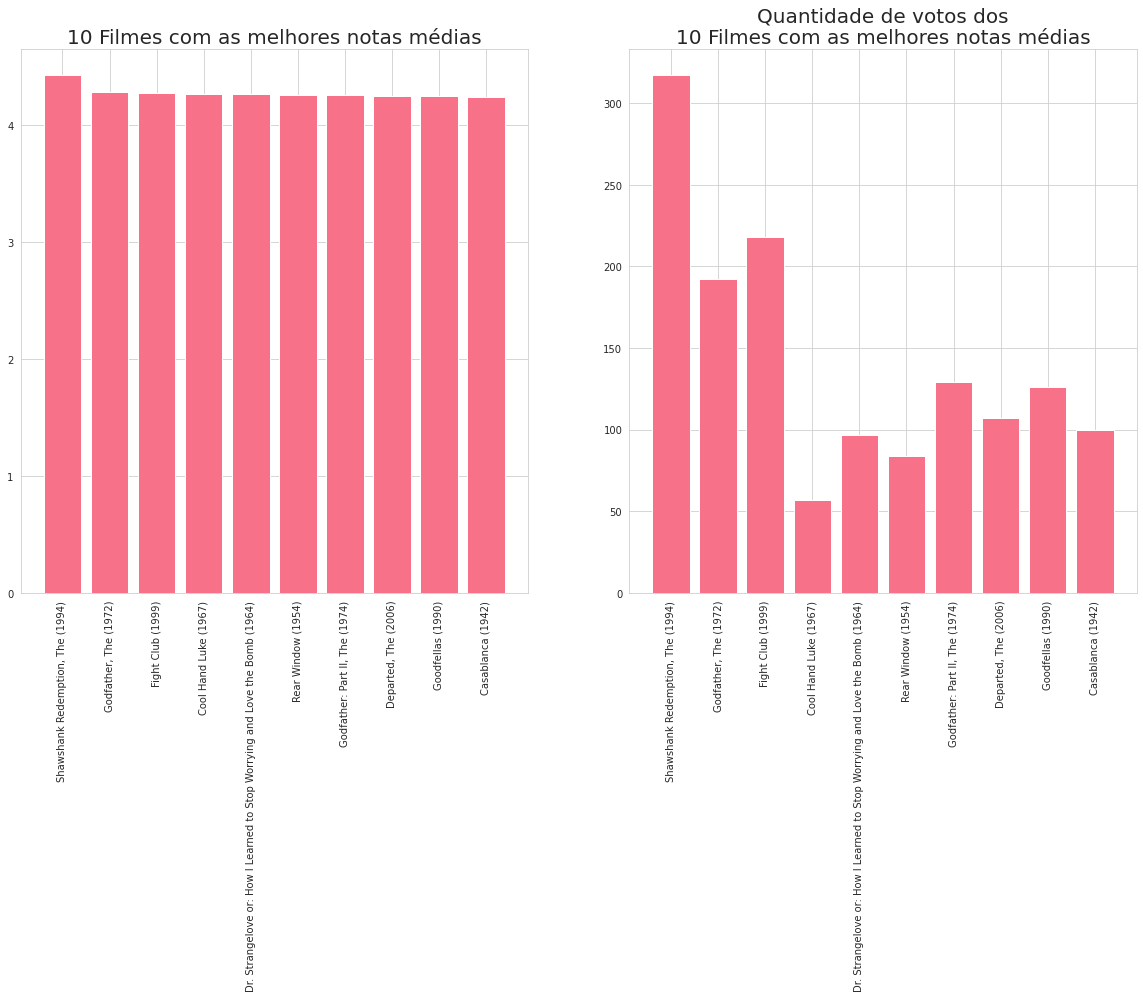

In [55]:
plt.rc('figure', figsize=(20,10))
area = plt.figure()
g1 = area.add_subplot(1,2,1)
g2 = area.add_subplot(1,2,2)

g1.bar(filmes_1.sort_values('nota_media', ascending=False)['nota_media'].head(10).index,
       filmes_1.sort_values('nota_media', ascending=False)['nota_media'].head(10).values)
g1.set_title("10 Filmes com as melhores notas médias", fontsize=20)
plt.setp(g1.get_xticklabels(), rotation=90);

g2.bar(filmes_1.sort_values('nota_media', ascending=False)['total_de_votos'].head(10).index,
       filmes_1.sort_values('nota_media', ascending=False)['total_de_votos'].head(10).values)
g2.set_title("Quantidade de votos dos\n10 Filmes com as melhores notas médias", fontsize=20)
plt.setp(g2.get_xticklabels(), rotation=90);

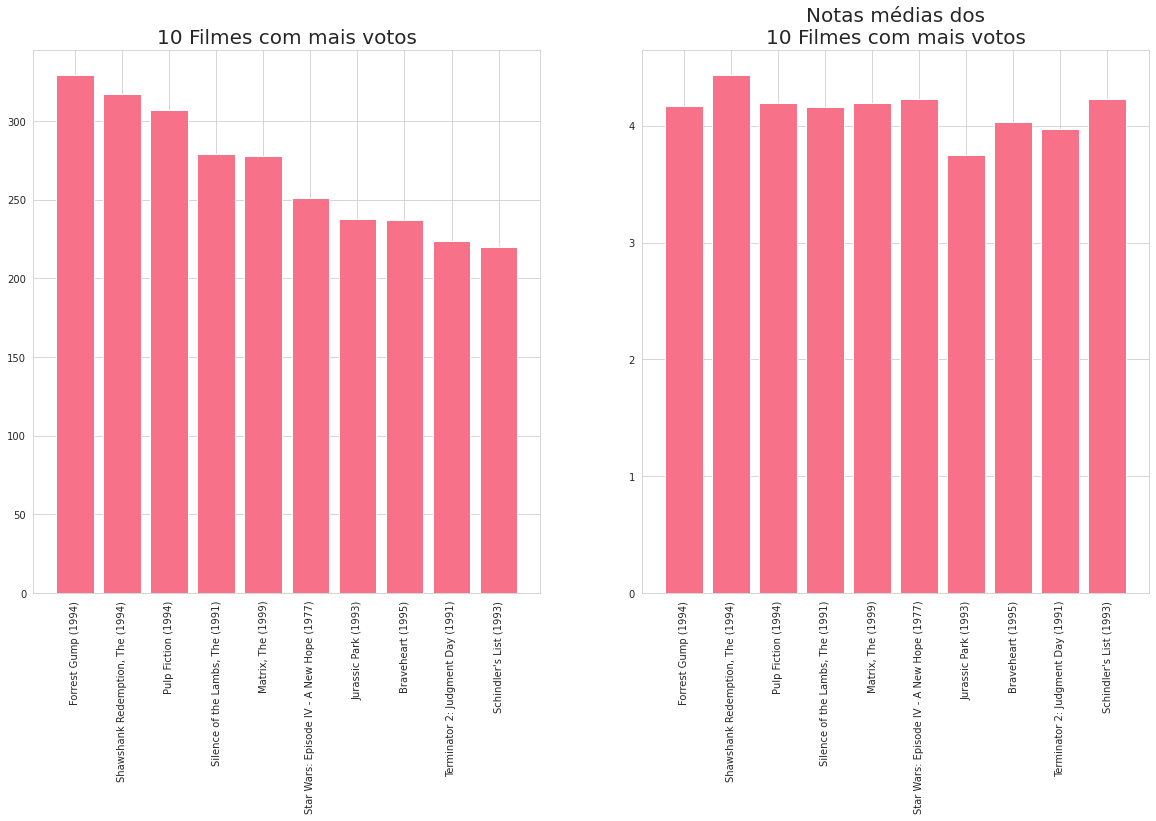

In [56]:
plt.rc('figure', figsize=(20,10))
area = plt.figure()
g1 = area.add_subplot(1,2,1)
g2 = area.add_subplot(1,2,2)

g1.bar(filmes_1.sort_values('total_de_votos', ascending=False)['total_de_votos'].head(10).index,
       filmes_1.sort_values('total_de_votos', ascending=False)['total_de_votos'].head(10).values)
g1.set_title("10 Filmes com mais votos", fontsize=20)
plt.setp(g1.get_xticklabels(), rotation=90);

g2.bar(filmes_1.sort_values('total_de_votos', ascending=False)['nota_media'].head(10).index,
       filmes_1.sort_values('total_de_votos', ascending=False)['nota_media'].head(10).values)
g2.set_title("Notas médias dos\n10 Filmes com mais votos", fontsize=20)
plt.setp(g2.get_xticklabels(), rotation=90);


In [57]:
# Nota média dos 10 filmes mais votados
filmes_1.sort_values('total_de_votos', ascending=False)[['nota_media', 'total_de_votos']].head(10)

,nota_media,total_de_votos
titulo,,
Forrest Gump (1994),4.164134,329.0
"Shawshank Redemption, The (1994)",4.429022,317.0
Pulp Fiction (1994),4.197068,307.0
"Silence of the Lambs, The (1991)",4.161290,279.0
"Matrix, The (1999)",4.192446,278.0
Star Wars: Episode IV - A New Hope (1977),4.231076,251.0
Jurassic Park (1993),3.750000,238.0
Braveheart (1995),4.031646,237.0
Terminator 2: Judgment Day (1991),3.970982,224.0


In [58]:
# 10 filmes com as notas mais altas
filmes_1.sort_values('nota_media', ascending=False)[['nota_media', 'total_de_votos']].head(10)

,nota_media,total_de_votos
titulo,,
"Shawshank Redemption, The (1994)",4.429022,317.0
"Godfather, The (1972)",4.289062,192.0
Fight Club (1999),4.272936,218.0
Cool Hand Luke (1967),4.271930,57.0
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041,97.0
Rear Window (1954),4.261905,84.0
"Godfather: Part II, The (1974)",4.259690,129.0
"Departed, The (2006)",4.252336,107.0
Goodfellas (1990),4.250000,126.0


##Conclusão

Como podemos ver, dos 10 filmes como melhores notas, 70% possui menos de 150 votos.
Enquanto os filmes com mais votos (sendo que décimo possui 220 votos), apenas 2 possuem notas abaixo de 4.

Com isso, podemos concluir que não se pode analisar dados isolados. Sempre seve-se ponderar sobre o que está sendo analisado.

No exemplo acima, se tivermos como objetivo achar qual o melhor filme, não podemos nos prender a nota_media, muitos filmes tem uma nota media alta, porém com poucos votos, talvez tenham sido pouco assistidos. Dessa forma, qual o melhor filme? Um com média alta e pouco assistido ou um com uma nota décimos mais baixos na nota, mas com muito mais votos?